# Check Python Version and pip Install h2o

In [5]:
!python --version

Python 3.11.7


In [ ]:
!pip install h2o

# Import Packages 

In [1]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# Read in the Data

In [3]:
df = pd.read_csv('gapminder.csv')
df.head()

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
0,Albania,1960,115.40,62.87,6.19,1636054.0,NaN,Europe,Southern Europe
1,Algeria,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,Africa,Northern Africa
2,Angola,1960,208.00,35.98,7.32,5270844.0,NaN,Africa,Middle Africa
3,Antigua and Barbuda,1960,NaN,62.97,4.43,54681.0,NaN,Americas,Caribbean
4,Argentina,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,Americas,South America


# Drop NA Rows

In [6]:
cleaned = df.dropna()
cleaned.head()

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
1,Algeria,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,Africa,Northern Africa
4,Argentina,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,Americas,South America
7,Australia,1960,20.30,70.87,3.45,10292328.0,9.667786e+10,Oceania,Australia and New Zealand
8,Austria,1960,37.30,68.75,2.70,7065525.0,5.239270e+10,Europe,Western Europe
10,Bahamas,1960,51.00,62.00,4.50,109526.0,1.306269e+09,Americas,Caribbean


# Filter for the Year 2011 and Variables of Interest

In [9]:
cleaned_2011 = df[df['year'] == 2011][['infant_mortality', 'fertility', 'population', 'gdp', 'life_expectancy']]
cleaned_2011.head()

,infant_mortality,fertility,population,gdp,life_expectancy
9435,14.3,1.75,2886010.0,6.321691e+09,77.4
9436,22.8,2.83,36717132.0,8.114345e+10,76.1
9437,106.8,6.10,21942296.0,2.701394e+10,58.1
9438,7.2,2.12,88152.0,8.017879e+08,75.9
9439,12.7,2.20,41655616.0,4.729353e+11,76.0


# Reset Index

In [12]:
cleaned_2011 = cleaned_2011.reset_index(drop = 'True')
cleaned_2011.head()

,infant_mortality,fertility,population,gdp,life_expectancy
0,14.3,1.75,2886010.0,6.321691e+09,77.4
1,22.8,2.83,36717132.0,8.114345e+10,76.1
2,106.8,6.10,21942296.0,2.701394e+10,58.1
3,7.2,2.12,88152.0,8.017879e+08,75.9
4,12.7,2.20,41655616.0,4.729353e+11,76.0


# Prepare Data for AutoML

In [14]:
# Initialize H2O cluster
h2o.init()

# Format Data as an H2OFrame
data_h2o = h2o.H2OFrame(cleaned_2011)

# Define predictors and target
x = ['infant_mortality', 'fertility', 'population', 'gdp']
y = 'life_expectancy'

# Split the data into training and test sets
train, test = data_h2o.split_frame(ratios=[0.8], seed=168)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Temurin-17.0.7+7 (build 17.0.7+7, mixed mode, sharing)
  Starting server from C:\Users\Moe\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Moe\AppData\Local\Temp\tmpgo_pmwlc
  JVM stdout: C:\Users\Moe\AppData\Local\Temp\tmpgo_pmwlc\h2o_Moe_started_from_python.out
  JVM stderr: C:\Users\Moe\AppData\Local\Temp\tmpgo_pmwlc\h2o_Moe_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_Moe_ly4xsx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.938 Gb
H2O_cluster_total_cores:,20
H2O_cluster_allowed_cores:,20
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Initialize and train the H2O AutoML model

In [16]:
aml = H2OAutoML(max_runtime_secs=60, seed=42)  # Adjust max_runtime_secs as needed
aml.train(x=x, y=y, training_frame=train)

# Retrieve and evaluate the best model
best_model = aml.leader
performance = best_model.model_performance(test)
print("H2O AutoML Performance:")
print(performance)

# View the leaderboard
print("Leaderboard:")
leaderboard = aml.leaderboard
print(leaderboard)

# Save the best model to a specified directory
#model_path = h2o.save_model(model=best_model, force=True)
#print(f"Best model saved to: {model_path}")


AutoML progress: |
15:13:54.108: AutoML: XGBoost is not available; skipping it.


15:13:54.923: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 143.0.

███████████████████████████████████████████████████████████████| (done) 100%
H2O AutoML Performance:
ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 9.570355101816052
RMSE: 3.093599053176745
MAE: 2.292954123520348
RMSLE: 0.044021925835521725
Mean Residual Deviance: 9.570355101816052
Leaderboard:
model_id                                                    rmse      mse      mae      rmsle    mean_residual_deviance
GBM_grid_1_AutoML_1_20241002_151354_model_2              4.25035  18.0655  3.02095  0.0655176                   18.0655
GBM_2_AutoML_1_20241002_151354                           4.26126  18.1583  3.08622  0.0655787                   18.1583
GBM_grid_1_AutoML_1_20241002_151354_model_25             4.27745  18.2965  3.10754  0.065796

# Model Visualizations and Inference

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

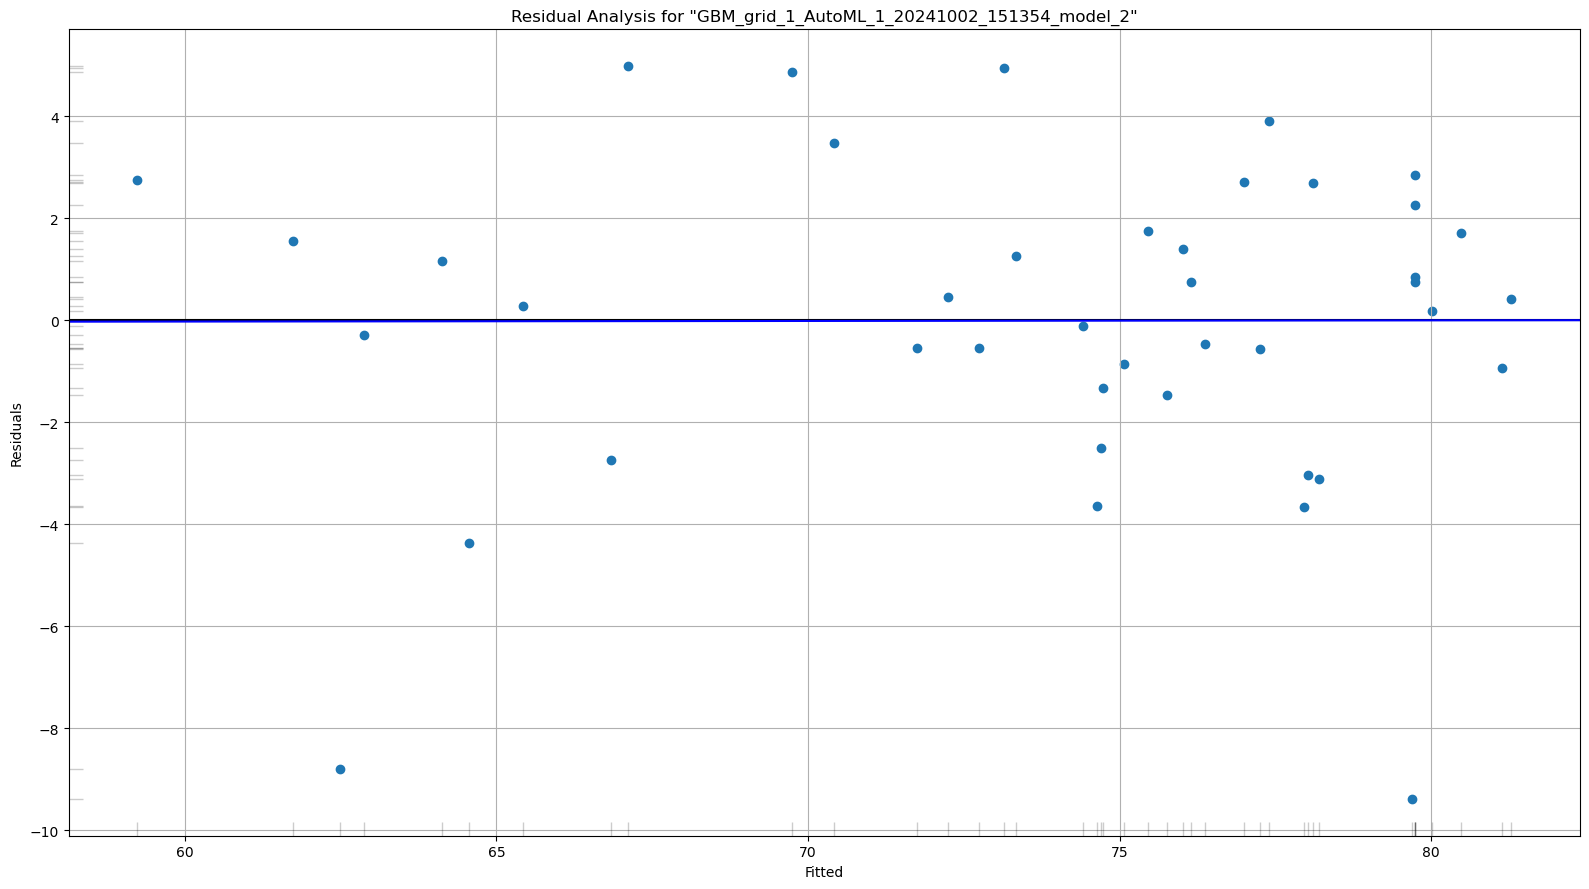

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

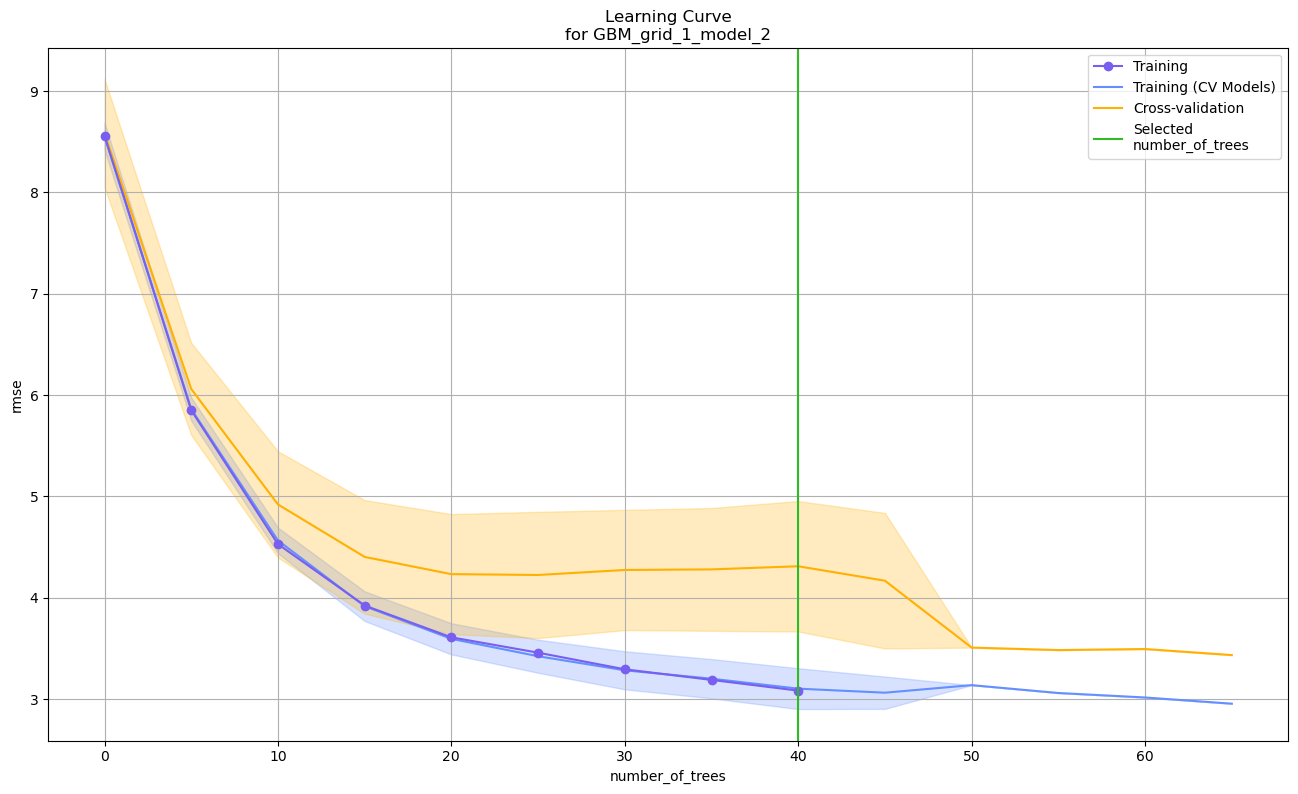

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

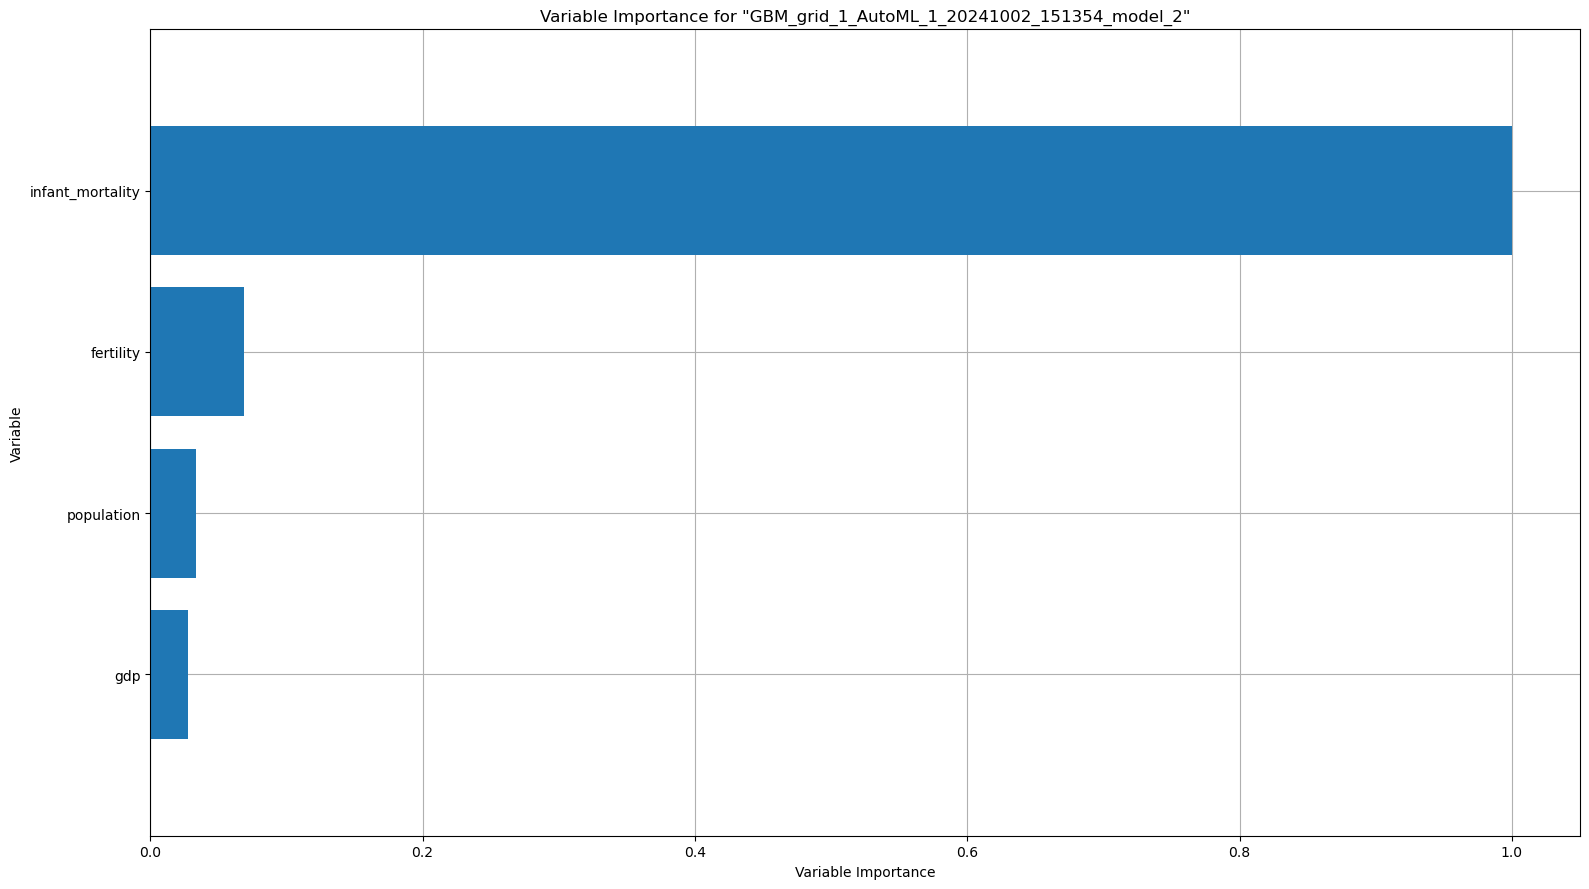

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

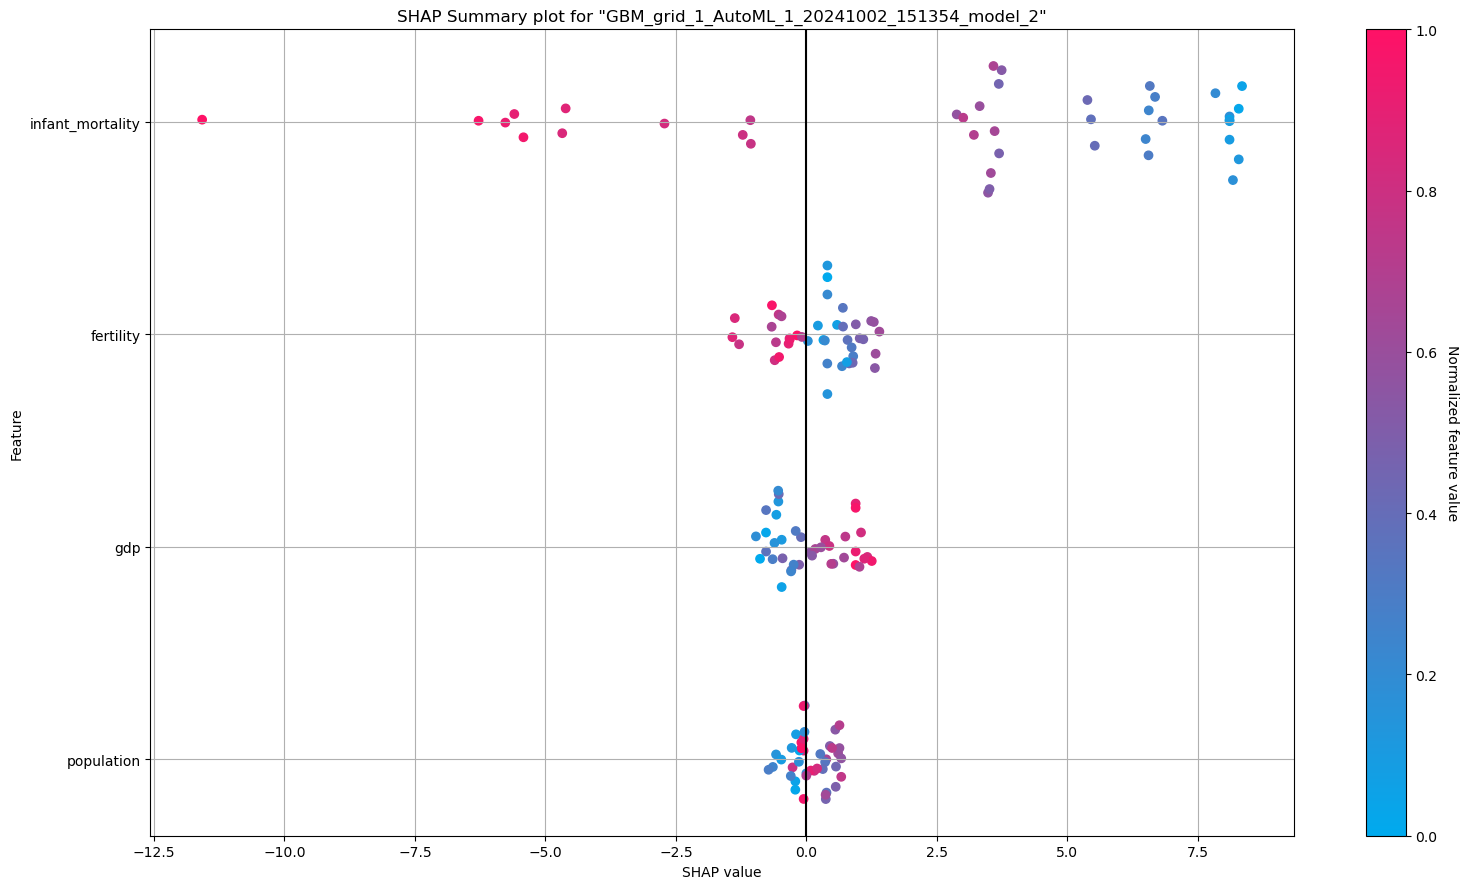

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

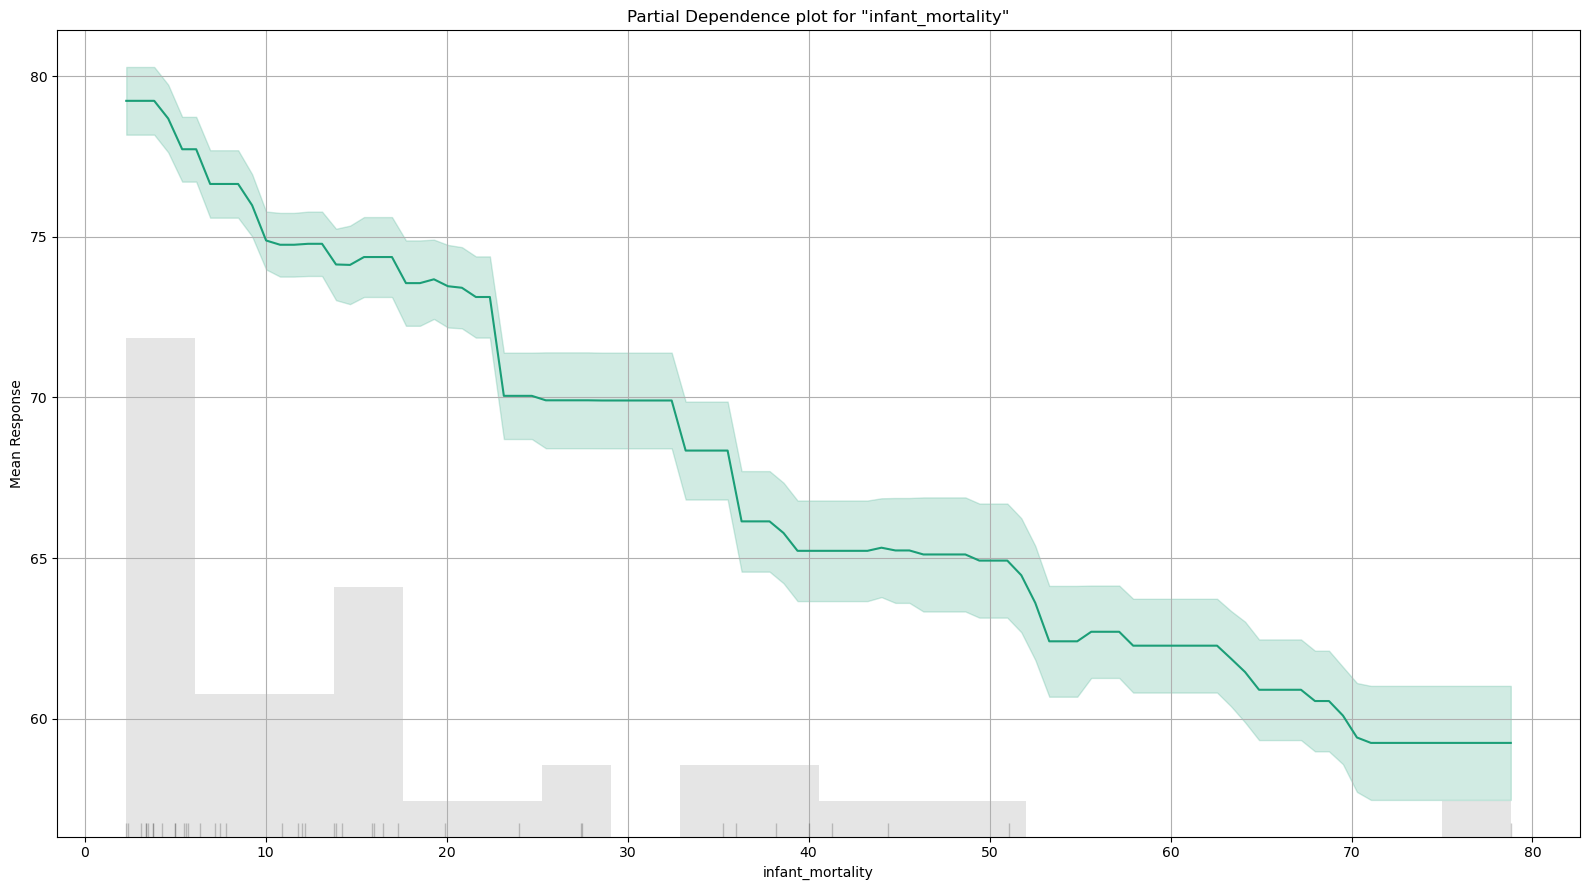

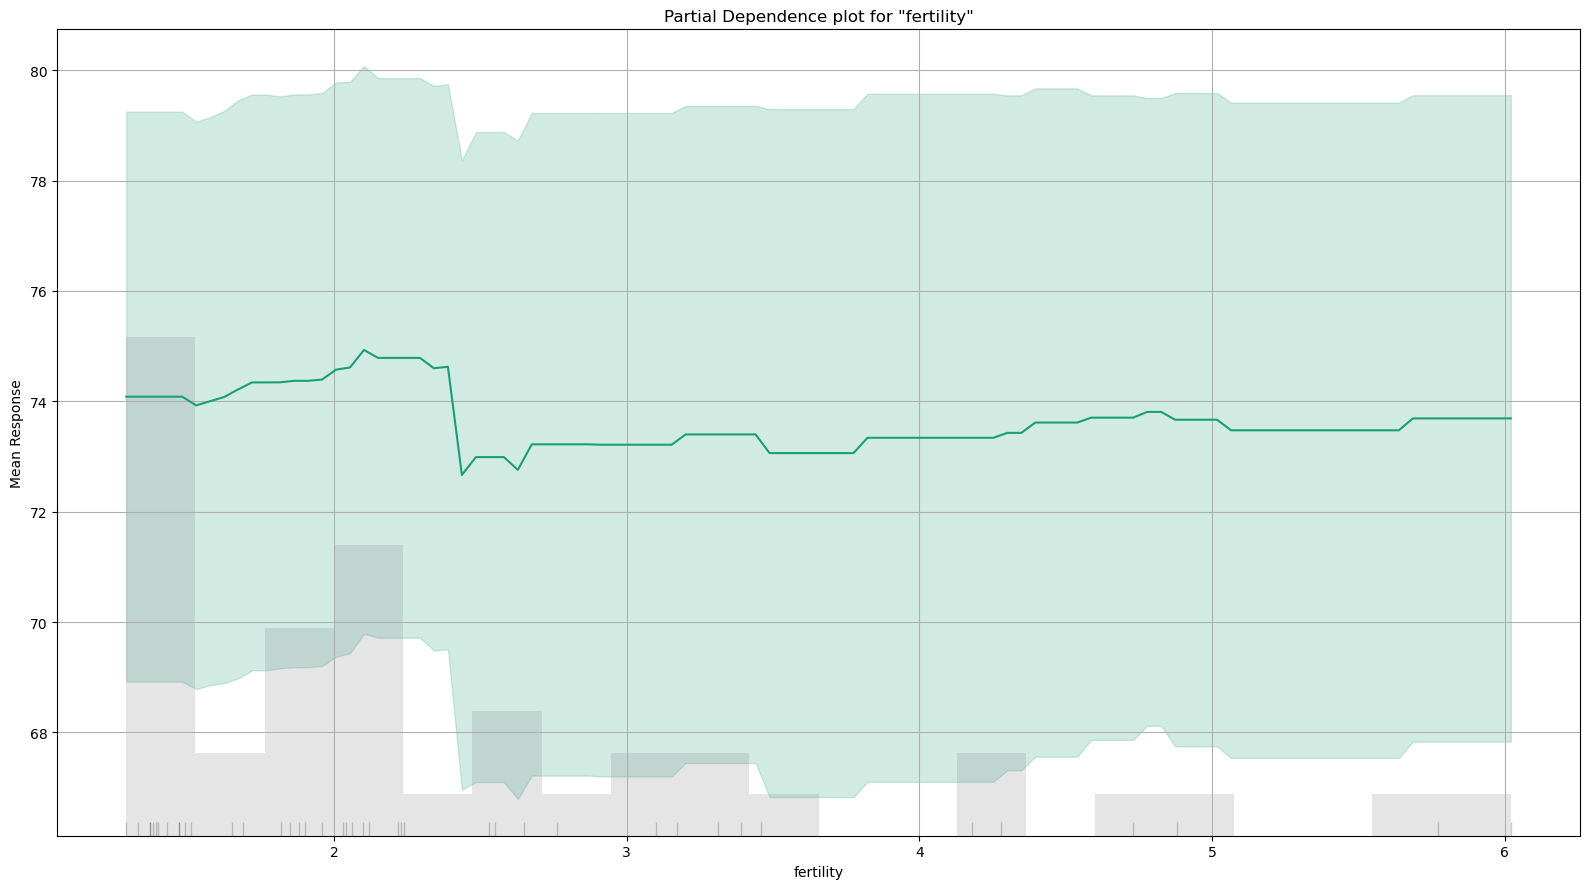

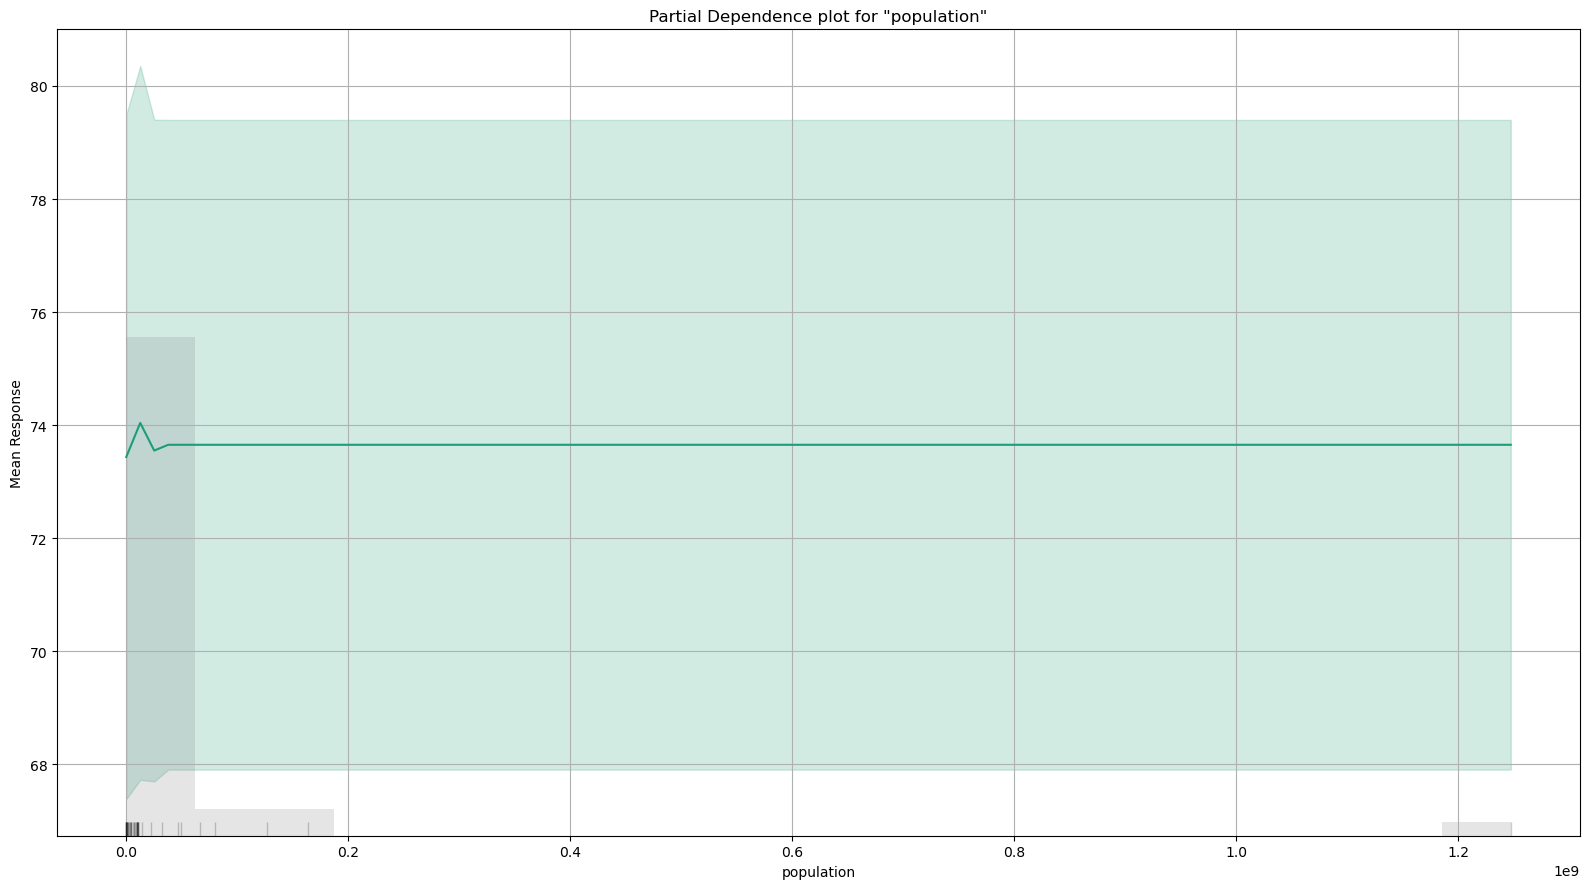

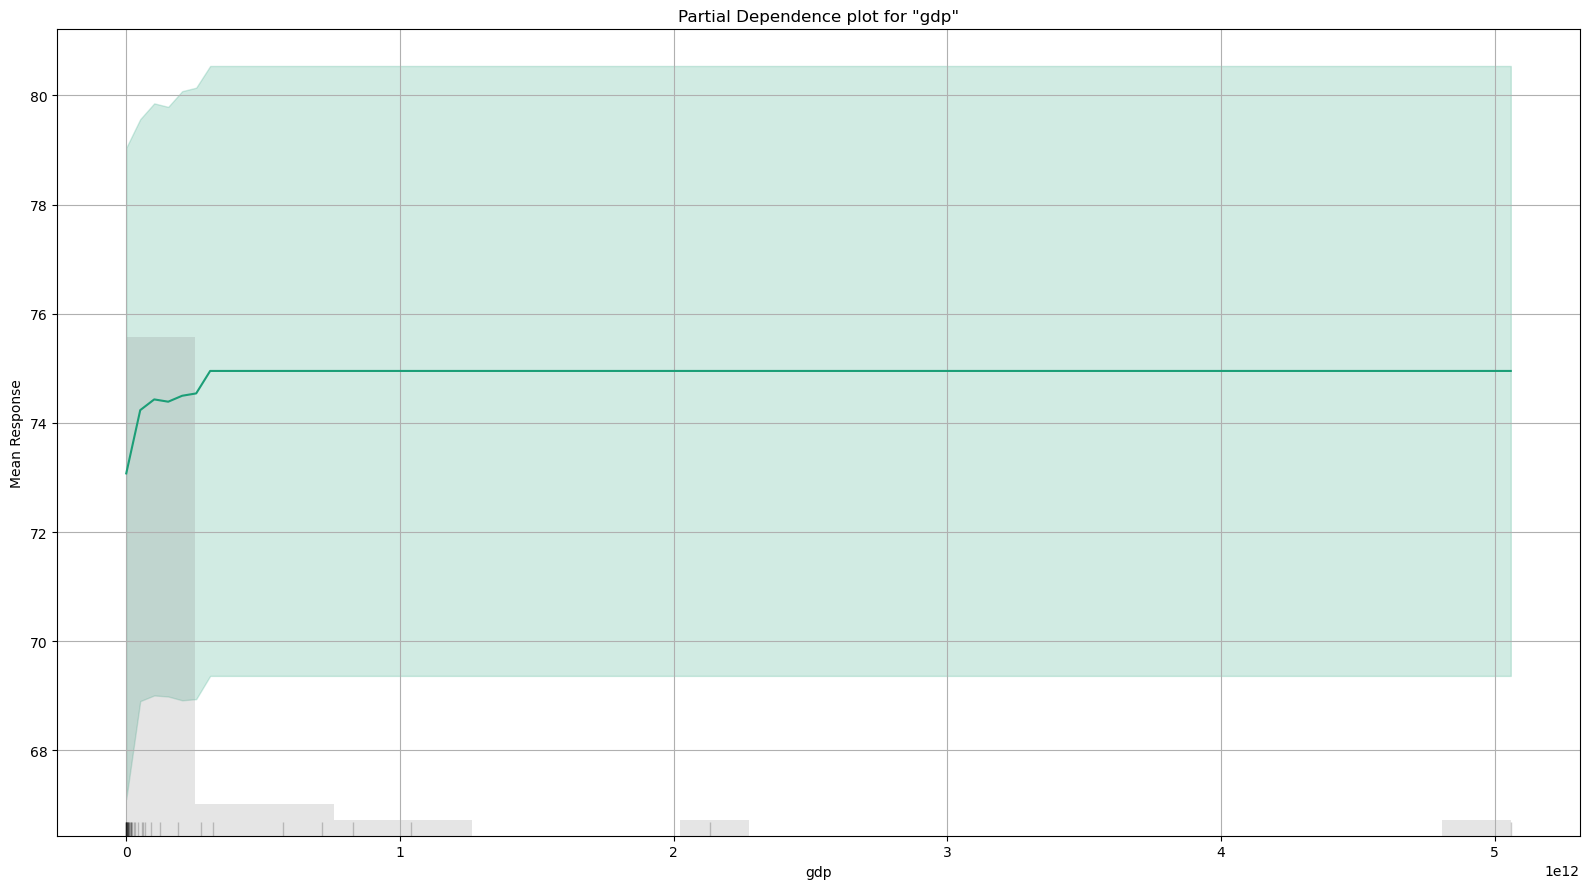

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

C:\Users\Moe\anaconda3\Lib\site-packages\h2o\explanation\_explain.py:1728: UserWarning: Original observation of "infant_mortality" for 70th Percentile is [nan, 76.00956382047]. Plotting of NAs is not yet supported.
  warnings.warn(msg)


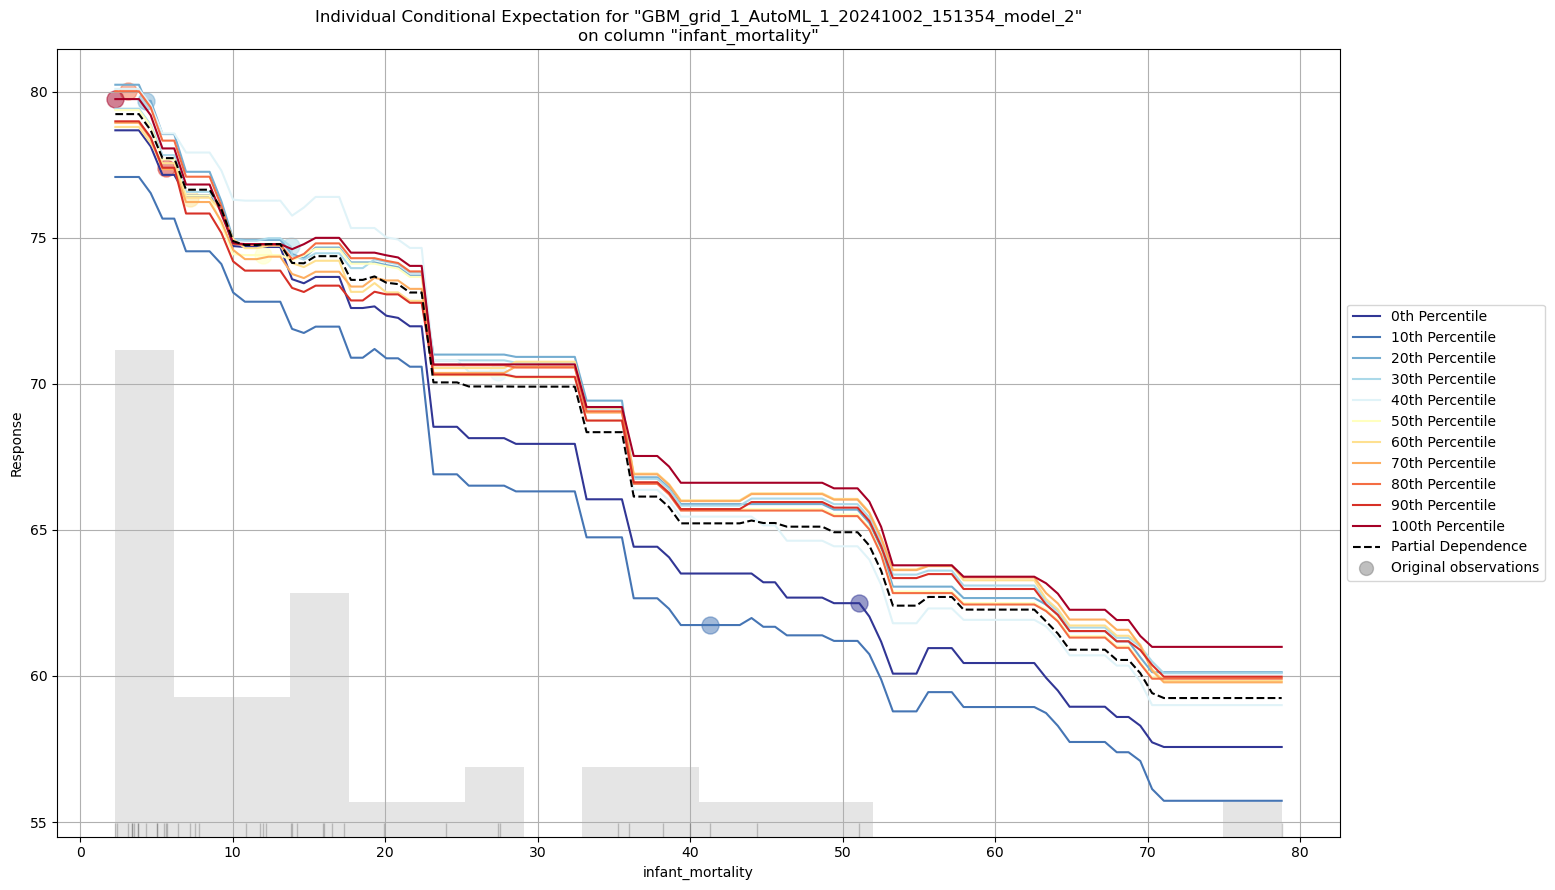

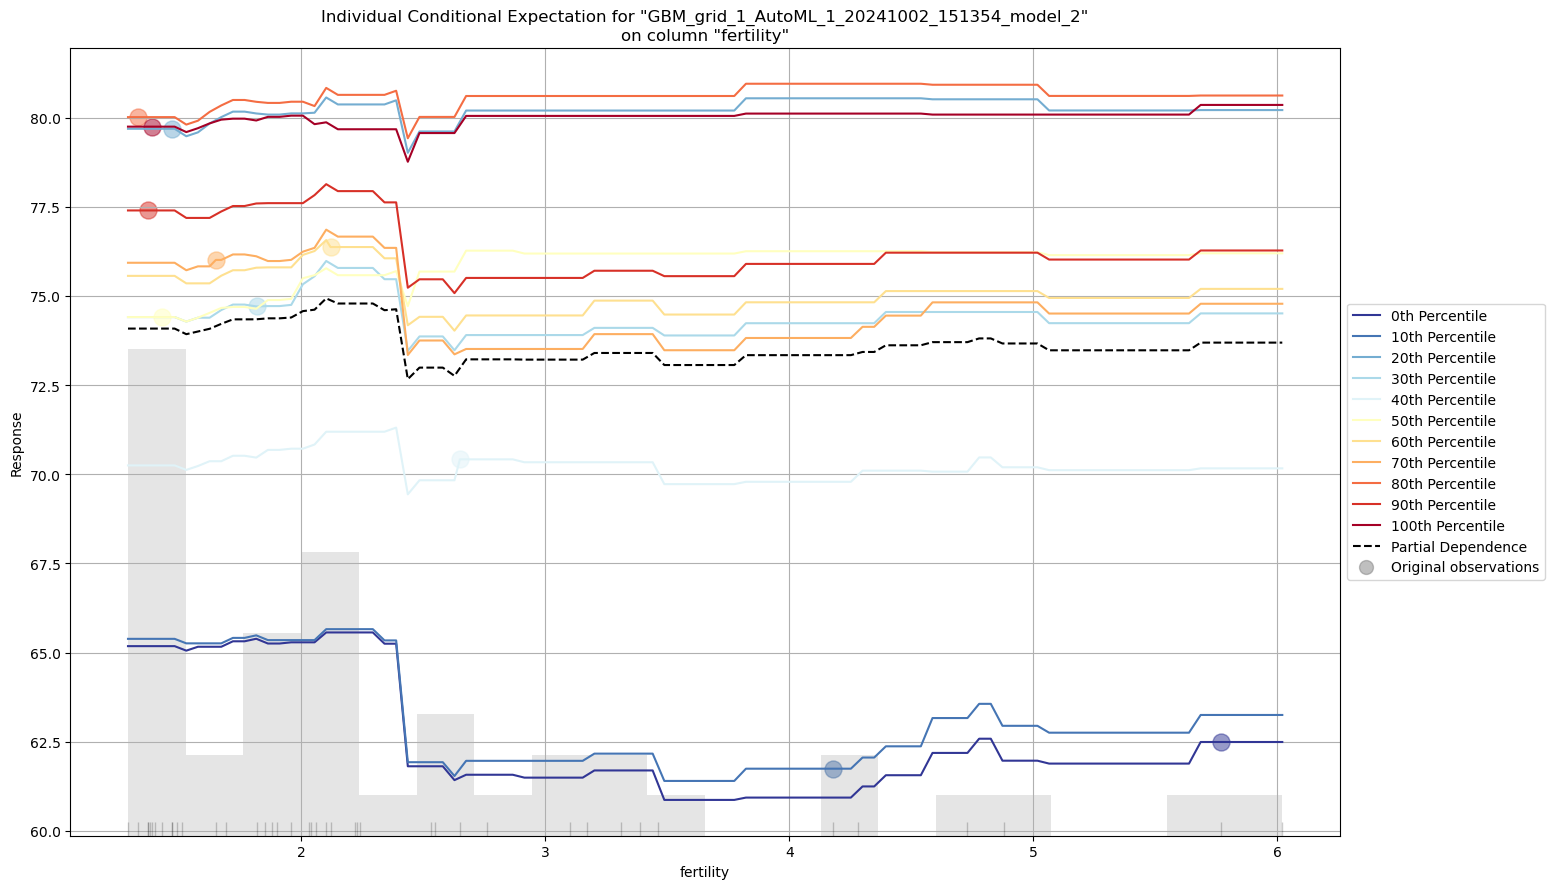

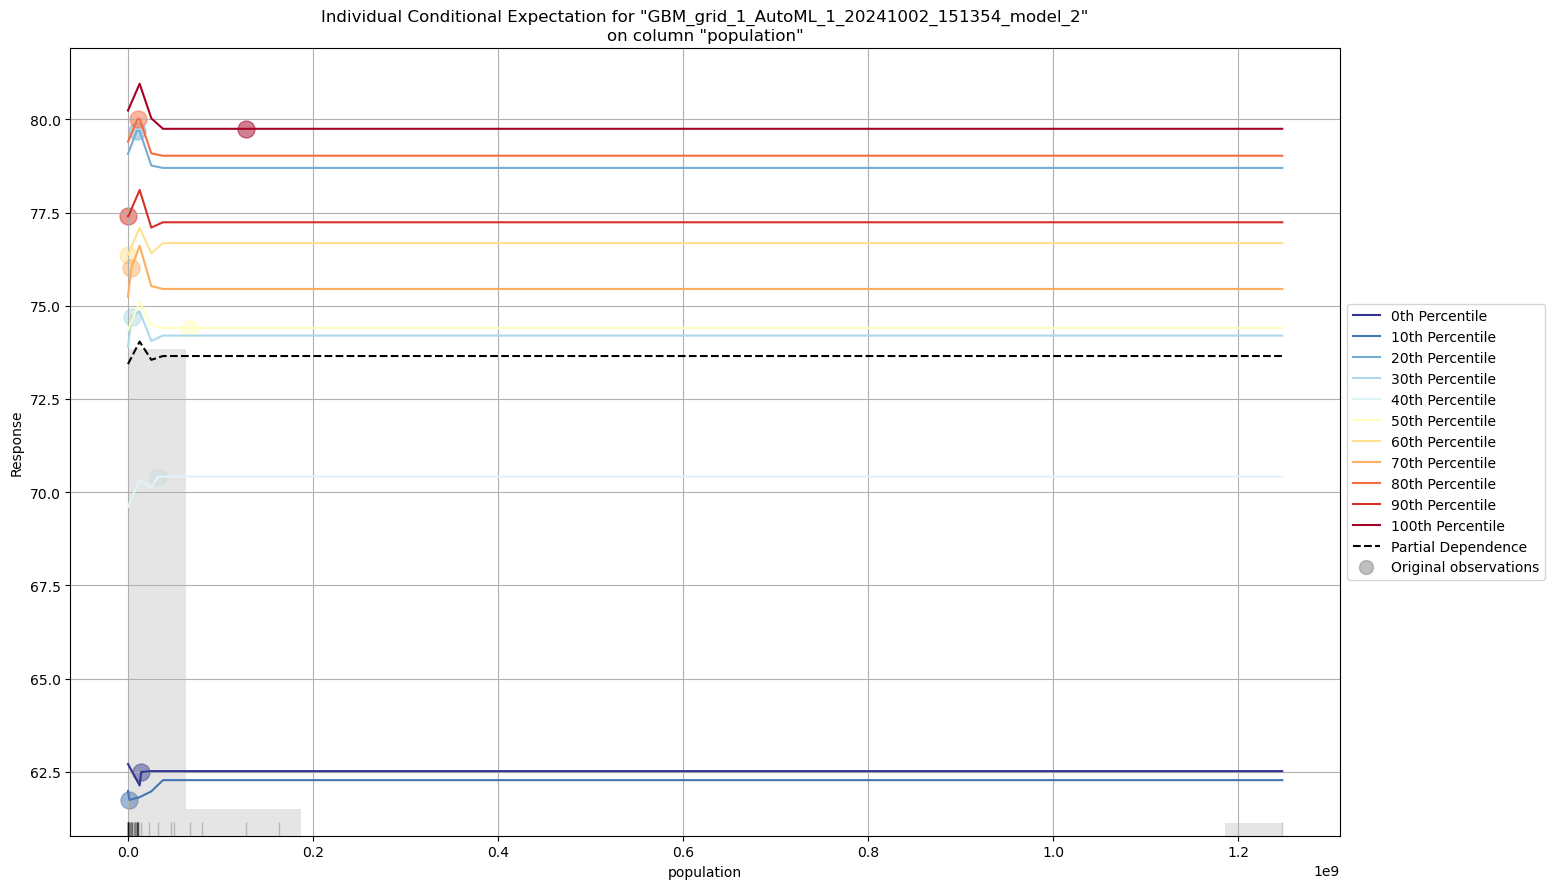

C:\Users\Moe\anaconda3\Lib\site-packages\h2o\explanation\_explain.py:1728: UserWarning: Original observation of "gdp" for 70th Percentile is [nan, 76.00956382047]. Plotting of NAs is not yet supported.
  warnings.warn(msg)


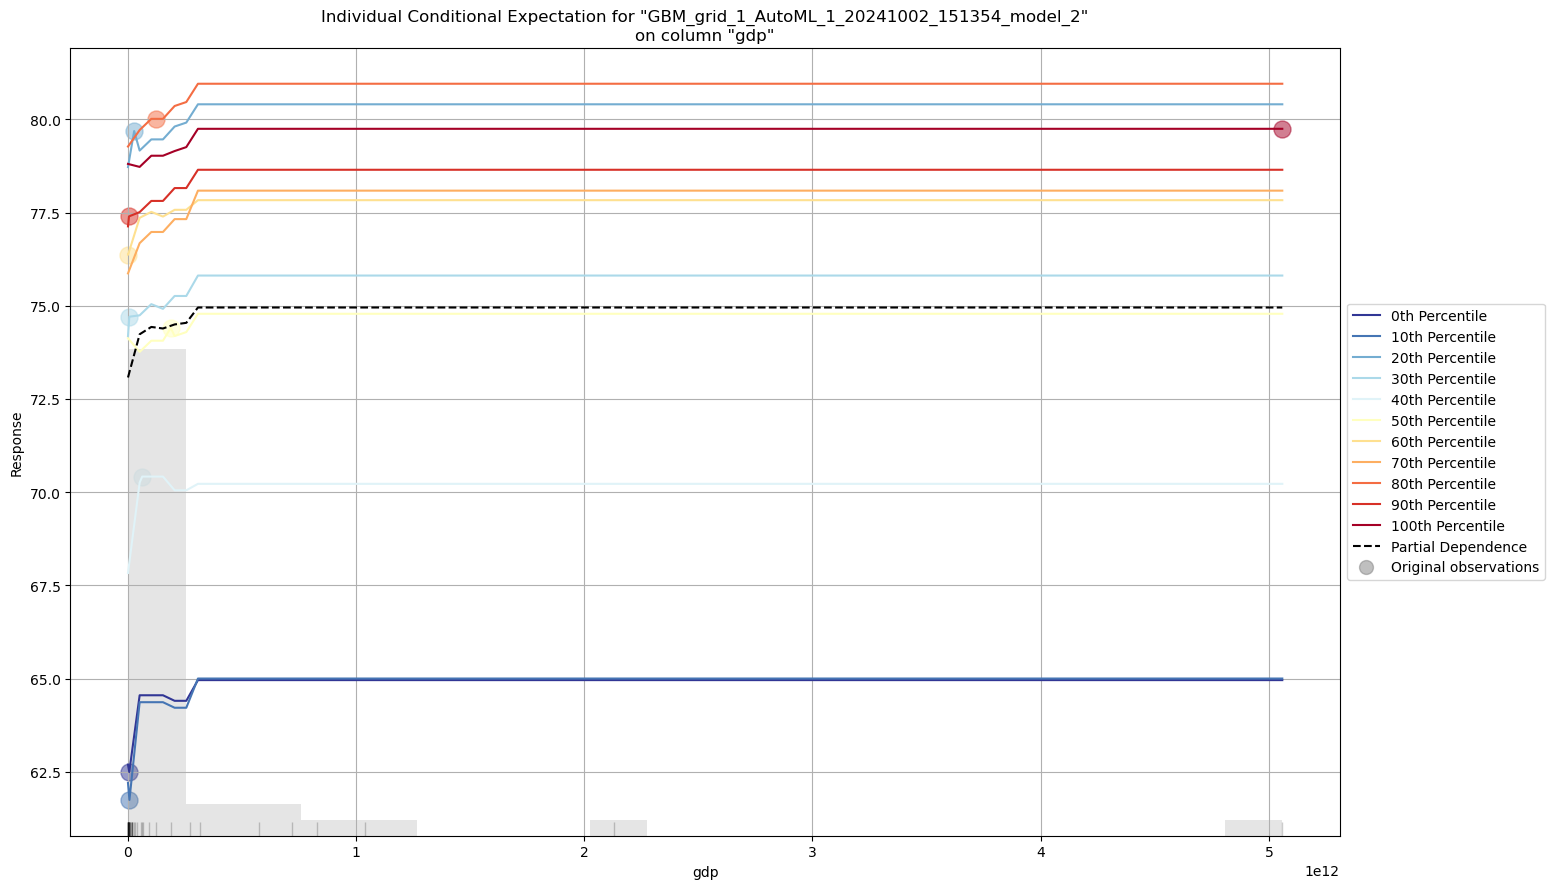

In [18]:
exa = best_model.explain(test)

# Shutdown the H2O cluster

In [20]:
h2o.shutdown(prompt=False)

H2O session _sid_be5d closed.


C:\Users\Moe\AppData\Local\Temp\ipykernel_30104\1954269801.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)
